LINEAR REGRESSION

PART 1: Implement from scratch

In [28]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
default_path = '/content/drive/My Drive/INF ML 552/HW4 - Regression/'
df = pd.read_csv(default_path + 'linear-regression.txt', header=None, names = ('X',"Y",'Z'))
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,X,Y,Z
0,0.693781,0.697544,3.252290
1,0.693737,0.575576,2.898651
2,0.000576,0.458192,1.986979
3,0.194953,0.470199,2.272075
4,0.031775,0.026546,0.231178
...,...,...,...
2995,0.675794,0.966809,4.710966
2996,0.956208,0.406283,2.415559
2997,0.153261,0.428193,1.717719
2998,0.604550,0.862078,4.106854


In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

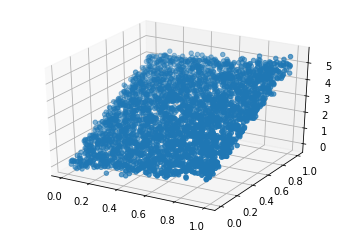

In [30]:
# Visualize datapoints on graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['X'], df['Y'], df['Z'])

plt.show()

In [0]:
N = len(df['X']) #total number of datapoints
x0 = np.ones(N)
X = np.array([x0, df['X'], df['Y']]).T
# Initial Coefficients
w = np.array([0, 0, 0]) #weights
y = np.array(df['Z'])

In [0]:
# Using least-squares solution to a linear matrix equation
def least_squares(X,y):
  np_weights = np.linalg.lstsq(X, y)[0]
  print('intercept:', np_weights[0])
  print('weights:', np_weights[1:])

In [33]:
least_squares(X,y)

intercept: 0.015235348288884565
weights: [1.08546357 3.99068855]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [0]:
# Using Gradient Descent
def gradient_descent(X, y, w, alpha, iterations):
    N = len(y)
    for i in range(iterations):
        # hypothesis values
        h = X.dot(w)
        # Loss = hypothesis - Actual y
        loss = h - y
        # Gradient Calculation
        gradient = X.T.dot(loss) / N
        # Changing Values of w using Gradient
        w = w - alpha * gradient
    return w

In [35]:
# iterations = 7000
# alpha = learning rate, which is a hyper-parameter and externally/manually set to the model
# alpha value cannot be estimated from data, therefore cannot know best value
# upon trial and error, 0.1 gives sufficient results with small variation.
alpha = 0.1
weights = gradient_descent(X, y, w, alpha, 7000)
print('intercept:', weights[0])
print('weights:', weights[1:])
# model: df['Z'] = weights[0] + weights[1]*df['X'] + weights[-1]*df['Y']


intercept: 0.01523534828890486
weights: [1.08546357 3.99068855]


PART 2: Implementation using library

In [36]:
from sklearn import linear_model

features = ['X', 'Y']
label = 'Z'

X = df[features].values.reshape(-1, len(features))
y = df[label].values

#ols = Ordinary Least Squares
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
print('weights:', model.coef_)
print('intercept:', model.intercept_)

# Based on the result of the fit, we obtain the following linear regression model:
# df['Z'] = (model.coef_[0]*df[X]) + (model.coef_[1]*df[Y]) - model.intercept_

R_squared = model.score(X, y)
print('R^2:', R_squared)

weights: [1.08546357 3.99068855]
intercept: 0.015235348288884953
R^2: 0.9722515684162281
